# Triangular Arbitrage - Bitfinex

In [21]:
from bitfinex import *
import pandas as pd

In [22]:
class arbitrage_check:
    
    def __init__(self):
        self.starter = Bitfinex_Pub()
        self.base = ["btc", "eth"]
        self.feed = Bitfinex_Pub()
        self.pairs = self.starter.symbols_v2()
    
    def df_clean(self):
        '''Remove unnecessary data and convert into dataframe'''
        pair_snap = ps.read_json(self.starter.tickers(self.pairs))
        pair_snap.columns = ["SYMBOL","BID", "BID_SIZE", "ASK", "ASK_SIZE", "DAILY_CHANGE", "DAILY_CHANGE_PERC", "LAST_PRICE", "VOLUME", "HIGH", "LOW"]
        pair_snap.drop(inplace=True, columns=["DAILY_CHANGE", "DAILY_CHANGE_PERC", "LAST_PRICE", "VOLUME", "HIGH", "LOW"])
        pair_snap = pair_snap.assign(QUOTE_C=pair_snap['SYMBOL'].str[-3:])
        pair_snap = pair_snap.assign(BASE_C=pair_snap['SYMBOL'].str[1:4])
        pair_snap.set_index("SYMBOL", inplace=True)
        return pair_snap
    
    def df_analysis(self):
        data = self.df_clean()

        data_ETH = data[data['QUOTE_C'] == "ETH"]
        data_BTC = data[data['QUOTE_C'] == "BTC"]

        data_cross = pd.merge(data_BTC, data_ETH, on='BASE_C')
        data_cross["CROSS_BID"] = data_cross["BID_x"]/data_cross["ASK_y"]
        data_cross["CROSS_ASK"] = data_cross["ASK_x"]/data_cross["BID_y"]
        data_cross["QUOTE_BID"] = data_BTC.at["tETHBTC", 'BID']
        data_cross["QUOTE_ASK"] = data_BTC.at["tETHBTC", 'ASK']

        data_cross["Buy_QUOTE"] = ((data_cross["QUOTE_BID"]/data_cross["CROSS_ASK"])-1)*100
        data_cross["Buy_CROSS"] = ((data_cross["CROSS_BID"]/data_cross["QUOTE_ASK"])-1)*100
        data_cross.sort_values(by=['Buy_QUOTE'])
        data_cross['positive'] = data_cross['Buy_CROSS'] > 0
        return data_cross
            

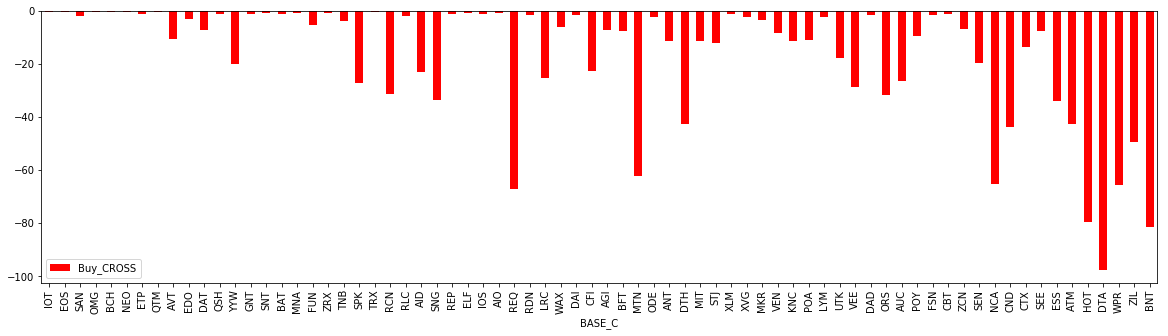

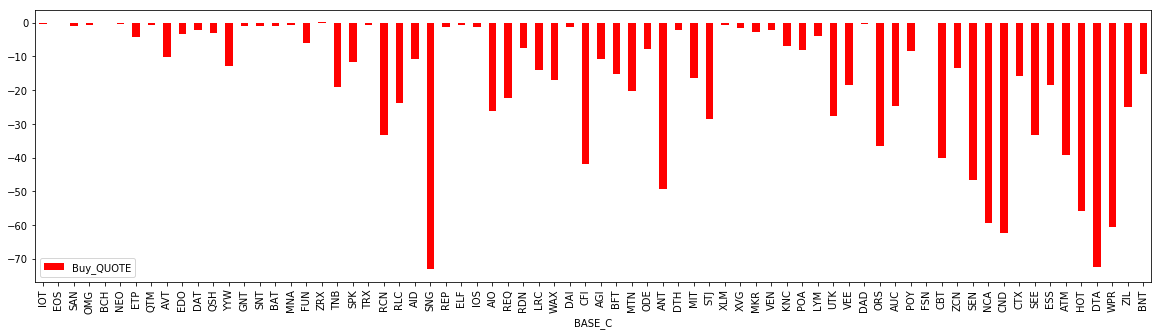

In [23]:
program = arbitrage_check()

data= program.df_analysis()

data.plot.bar(x="BASE_C",y="Buy_CROSS",figsize=(20,5),color=data.positive.map({True: 'g', False: 'r'}))
data.plot.bar(x="BASE_C",y="Buy_QUOTE",figsize=(20,5),color=data.positive.map({True: 'g', False: 'r'}))

In [24]:
#Descriptive Statistics
data.describe()

,BID_x,BID_SIZE_x,ASK_x,ASK_SIZE_x,BID_y,BID_SIZE_y,ASK_y,ASK_SIZE_y,CROSS_BID,CROSS_ASK,QUOTE_BID,QUOTE_ASK,Buy_QUOTE,Buy_CROSS
count,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,72.000000,7.200000e+01,72.000000,7.200000e+01,72.000000,72.000000,7.200000e+01,7.200000e+01,72.000000,72.000000
mean,2.633400e-03,5.869058e+05,2.670354e-03,1.697376e+05,0.045061,5.538391e+05,0.045900,1.229886e+05,0.048468,0.076982,5.840300e-02,5.843400e-02,-16.743767,-17.055414
std,1.468571e-02,8.869327e+05,1.483871e-02,3.125184e+05,0.251183,8.032150e+05,0.255085,2.136328e+05,0.013400,0.032110,9.782624e-17,6.987588e-17,19.321570,22.932191
min,1.700000e-07,1.114878e+02,5.000000e-07,3.893079e+01,0.000005,1.925649e+02,0.000009,1.544120e+01,0.001429,0.058332,5.840300e-02,5.843400e-02,-73.196238,-97.555239
25%,3.200000e-06,4.782566e+04,4.990000e-06,1.295415e+04,0.000070,3.160647e+04,0.000098,8.108408e+03,0.043487,0.059190,5.840300e-02,5.843400e-02,-24.838135,-25.579381
50%,1.495500e-05,2.494895e+05,1.696500e-05,5.209218e+04,0.000251,1.925754e+05,0.000291,4.466092e+04,0.054226,0.065170,5.840300e-02,5.843400e-02,-10.382921,-7.201121
75%,8.861250e-05,8.468059e+05,1.116400e-04,1.847222e+05,0.001650,7.414670e+05,0.001752,1.367292e+05,0.057683,0.077703,5.840300e-02,5.843400e-02,-1.329109,-1.286008
max,9.940000e-02,4.985880e+06,9.948000e-02,1.730846e+06,1.700500,3.783812e+06,1.705300,1.249464e+06,0.058289,0.217891,5.840300e-02,5.843400e-02,0.121864,-0.248376


In [25]:
data

,BID_x,BID_SIZE_x,ASK_x,ASK_SIZE_x,QUOTE_C_x,BASE_C,BID_y,BID_SIZE_y,ASK_y,ASK_SIZE_y,QUOTE_C_y,CROSS_BID,CROSS_ASK,QUOTE_BID,QUOTE_ASK,Buy_QUOTE,Buy_CROSS,positive
0,1.267000e-04,6.424898e+04,1.267800e-04,8.105383e+04,BTC,IOT,0.002166,2.655372e+04,0.002176,3.357349e+04,ETH,0.058218,0.058540,0.058403,0.058434,-0.233967,-0.369517,False
1,1.003500e-03,2.029002e+04,1.004600e-03,1.369153e+04,BTC,EOS,0.017179,2.191490e+04,0.017221,7.927078e+04,ETH,0.058272,0.058478,0.058403,0.058434,-0.128893,-0.277446,False
2,1.127100e-04,5.989617e+04,1.136700e-04,4.425865e+04,BTC,SAN,0.001928,6.891092e+04,0.001968,1.949284e+04,ETH,0.057277,0.058942,0.058403,0.058434,-0.914766,-1.979734,False
3,7.554000e-04,1.094033e+04,7.587600e-04,8.828561e+03,BTC,OMG,0.012906,6.818505e+03,0.012990,4.531344e+04,ETH,0.058152,0.058791,0.058403,0.058434,-0.660404,-0.481869,False
4,9.940000e-02,1.114878e+02,9.948000e-02,1.109045e+02,BTC,BCH,1.700500,3.289861e+02,1.705300,2.982364e+02,ETH,0.058289,0.058500,0.058403,0.058434,-0.166565,-0.248376,False
5,3.832400e-03,2.284149e+03,3.842700e-03,3.025240e+03,BTC,NEO,0.065514,1.271321e+03,0.065851,1.601355e+03,ETH,0.058198,0.058655,0.058403,0.058434,-0.429018,-0.403783,False
6,3.381000e-04,5.503671e+04,3.436200e-04,5.547514e+04,BTC,ETP,0.005629,2.818776e+04,0.005862,1.021129e+04,ETH,0.057676,0.061042,0.058403,0.058434,-4.323914,-1.297914,False
7,9.197900e-04,5.748934e+03,9.273000e-04,4.124932e+03,BTC,QTM,0.015757,5.190458e+03,0.015785,1.621398e+03,ETH,0.058270,0.058850,0.058403,0.058434,-0.759617,-0.280870,False
8,9.448000e-05,2.509836e+04,1.129900e-04,1.258380e+04,BTC,AVT,0.001740,3.650186e+03,0.001810,3.396227e+02,ETH,0.052202,0.064933,0.058403,0.058434,-10.056589,-10.665402,False
9,1.102100e-04,1.472911e+04,1.113400e-04,7.261520e+03,BTC,EDO,0.001840,2.875297e+04,0.001942,1.227786e+04,ETH,0.056757,0.060508,0.058403,0.058434,-3.478211,-2.870559,False
